Code for the completion of exercises 1.

# A
The first section asks for a iterative scheme to integrate the steady state solution as described in the notes. The differential that we aim to find a solution for is

$$\beta b^3\partial_{z}b = \alpha b^3 - Q$$

for some constant Q and b a function of z only (steady state solution).

In [2]:
# A discretization update scheme allowing for the interation from b0 = 0 to bJ = H
def iterative_scheme(alpha, beta, Q, bPrev, H, dz):
    # We calculate the forward euler discretiztion approximation of the derivative
    b = bPrev + dz * (alpha * bPrev**3 - Q) / (beta * bPrev)
    return b

def solve(alpha, beta, Q, H, J, b0):
    # Initialize the array to store the values of b at each step
    b_values = [b0]
    dz = H / J

    # Iteratively apply the update scheme to compute b at each step
    for j in range(1, J + 1):
        b_next = iterative_scheme(alpha, beta, Q, b_values[-1], H, dz)
        b_values.append(b_next)

    # Create a 2 column table of z againsst b values 
    z_values = [j * dz for j in range(J + 1)]
    result = list(zip(z_values, b_values))
    
    return result

In [14]:
result = solve(0.4709, 1, 0.99, 1, 1000, 1.178164343)

# Move result into pandas dataframe
import pandas as pd
df = pd.DataFrame(result, columns=['z', 'b'])



In [15]:
# Plot the results with plotly.express
import plotly.express as px

fig = px.line(df, x='z', y='b', title='Discretization of b against z', labels={'z': 'z', 'b': 'b'})
fig.show()


# B
Plotting for the time-dependent solution

In [28]:
# Solving for the time dependent solution

# One iteration of the time dependent scheme
def time_d_iteration(bPrev: list[float], alpha: float, b0: float, 
                     beta: float, dz: float, dt: float):
    # Note that bPrev is the points from the previous time step at j-1, j and j+1 where we are 
    # calculating for the current time step at position j
    bNext: float = bPrev[1] - dt * (3 * alpha * b0 ** 2 * (bPrev[1] - bPrev[0]) / dz 
                             - beta * (bPrev[2] - 2 * bPrev[1] + bPrev[0]) / dz**2)
    return bNext

def solve_time_dependent(alpha: float, beta: float, H: float, 
                         b0: float, bT: float, J: int, dt: float, max_time: float = 2.5):
    # Solving the time dependent problem considering perturbations from a constant start
    # value bT at t = 0 with boundary conditions b(0, t) = b0 and b(H, t) = bT.
    # Note the possibility of discontinuity at z = 0 at t = 0.

    # Initialize arrays
    dz: float = H / J
    print(f'dz: {dz}')

    # Calculate the upper bound on dt for stability
    dt_stable: float = dz**2 / (3 * dz * alpha * b0**2 + 2 * beta * b0 ** 3)
    print(f"Stable dt: {dt_stable}, Given dt: {dt}")

    z_values: list[float] = [j * dz for j in range(J + 1)]
    b_values: list[list[float]] = [[0 for _ in range(J + 1)]]  # Initial condition: b(z, 0) = b0 for all z

    time_steps = int(max_time / dt)
    print(f'Time steps: {time_steps}')
    for time_step in range(time_steps):
        # Initialize the next time step array with boundary condition
        b_next: list[float] = [b0 - bT] + [0.0 for _ in range(1, J)] + [0]
        for j in range(1, J):
            b_next[j] = time_d_iteration(b_values[-1][j-1:j+2], alpha, b0, beta, dz, dt)
        b_values.append(b_next)

    time_values: list[float] = [n * dt for n in range(len(b_values))]

    # Adjust all the b_values back up by bT
    for n in range(len(b_values)):
        for j in range(len(b_values[n])):
            b_values[n][j] += bT
        
    return z_values, time_values, b_values


In [29]:
z_values, time_values, b_values = solve_time_dependent(0.4709, 1, 1, 1.178164343, 0.585373798, 41, 1e-4)

dz: 0.024390243902439025
Stable dt: 0.0001792586221928934, Given dt: 0.0001
Time steps: 25000


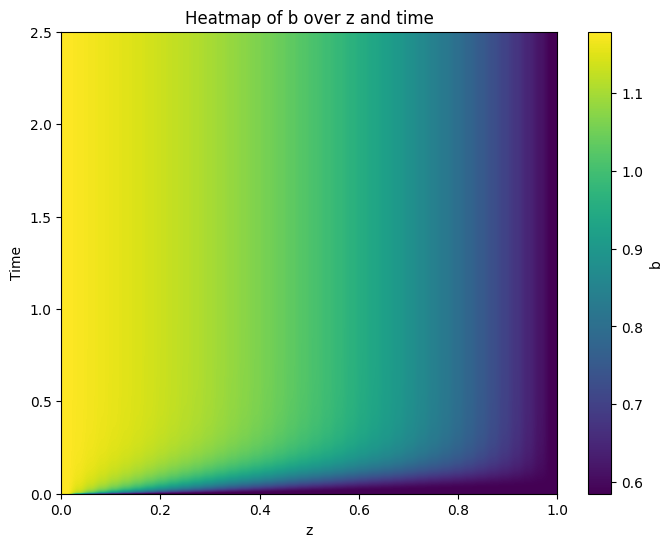

In [30]:
import numpy as np

import matplotlib.pyplot as plt

# Convert b_values to a 2D numpy array (time x z)
arr = np.array(b_values)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(
    arr,
    aspect='auto',
    origin='lower',  # so time increases upward like in the Plotly version
    extent=(z_values[0], z_values[-1], time_values[0], time_values[-1]),
    cmap='viridis'
)

ax.set_xlabel('z')
ax.set_ylabel('Time')
ax.set_title('Heatmap of b over z and time')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('b')

plt.show()



In [31]:
# Plot for grid sizes 11, 21, 41 

# 11
z_values_11, time_values_11, b_values_11 = solve_time_dependent(0.4709, 
                                                                1, 1, 1.178164343, 0.585373798, 11, 1e-4)

# 21
z_values_21, time_values_21, b_values_21 = solve_time_dependent(0.4709, 
                                                                1, 1, 1.178164343, 0.585373798, 21, 1e-4)

# 41
z_values_41, time_values_41, b_values_41 = solve_time_dependent(0.4709, 
                                                               1, 1, 1.178164343, 0.585373798, 41, 1e-4)

dz: 0.09090909090909091
Stable dt: 0.0023961783475749702, Given dt: 0.0001
Time steps: 25000
dz: 0.047619047619047616
Stable dt: 0.0006740446977058817, Given dt: 0.0001
Time steps: 25000
dz: 0.024390243902439025
Stable dt: 0.0001792586221928934, Given dt: 0.0001
Time steps: 25000


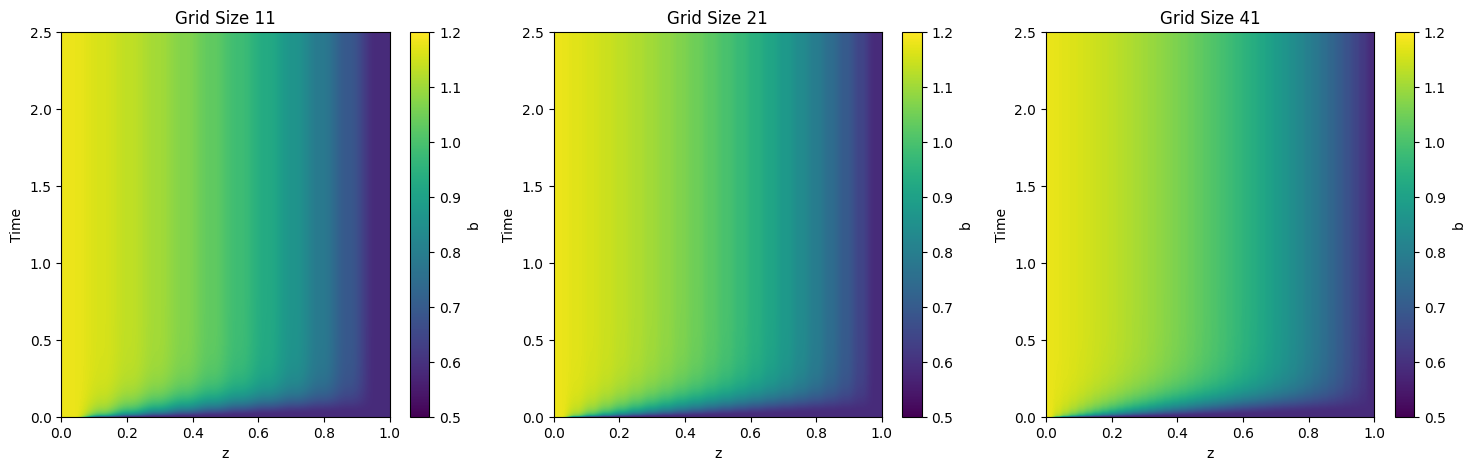

In [32]:
# Plot each of the figures with the same b value colour scale
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
im1 = axs[0].imshow(
    np.array(b_values_11),
    aspect='auto',
    origin='lower',
    extent=(z_values_11[0], z_values_11[-1], time_values_11[0], time_values_11[-1]),
    cmap='viridis',
    vmin=0.5, vmax=1.2  # Set the same colour scale for all plots
)
axs[0].set_title('Grid Size 11')
axs[0].set_xlabel('z')
axs[0].set_ylabel('Time')
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar1.set_label('b')
im2 = axs[1].imshow(
    np.array(b_values_21),
    aspect='auto',
    origin='lower',
    extent=(z_values_21[0], z_values_21[-1], time_values_21[0], time_values_21[-1]),
    cmap='viridis',
    vmin=0.5, vmax=1.2  # Set the same colour scale for all plots
)
axs[1].set_title('Grid Size 21')
axs[1].set_xlabel('z')
axs[1].set_ylabel('Time')
cbar2 = fig.colorbar(im2, ax=axs[1])    
cbar2.set_label('b')
im3 = axs[2].imshow(
    np.array(b_values_41),
    aspect='auto',
    origin='lower',
    extent=(z_values_41[0], z_values_41[-1], time_values_41[0], time_values_41[-1]),
    cmap='viridis',
    vmin=0.5, vmax=1.2  # Set the same colour scale for all plots
)
axs[2].set_title('Grid Size 41')
axs[2].set_xlabel('z')
axs[2].set_ylabel('Time')
cbar3 = fig.colorbar(im3, ax=axs[2])
cbar3.set_label('b')

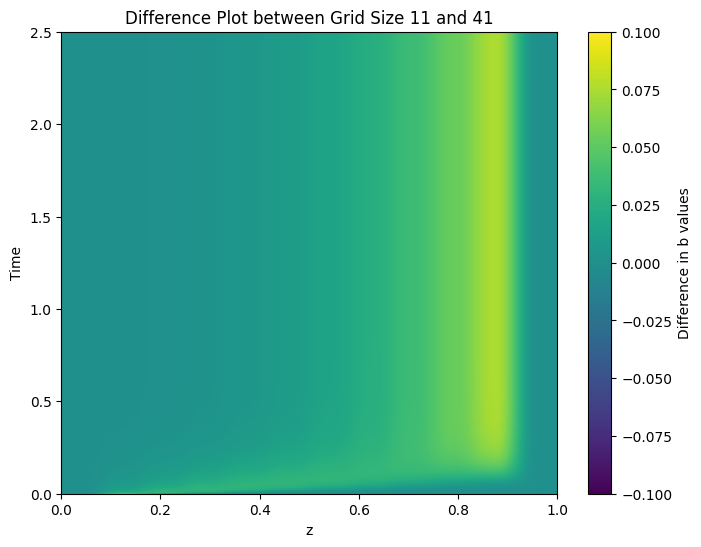

In [37]:
# Create a difference plot for 11 and 41
b_diff = np.array(b_values_11) - np.array([row[::4] + [row[-1]] for row in b_values_41] )  # Downsample 41 to match 11
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(
    b_diff,
    aspect='auto',
    origin='lower',
    extent=(z_values_11[0], z_values_11[-1], time_values_11[0], time_values_11[-1]),
    cmap='viridis',
    vmin=-0.1, vmax=0.1  # Set the colour scale for difference plot
)
ax.set_title('Difference Plot between Grid Size 11 and 41') 
ax.set_xlabel('z')
ax.set_ylabel('Time')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Difference in b values')
plt.show()

# C
Considering the error by taking the high resolution steady state solution to be exact and considering how the error in the time-dependent solutions at t=2 depends on the spacing $\Delta z$. 